# **A. Загрузка и первичный обзор**

### Subtask:
Загрузить данные из файла '*yahoo.csv*' в DataFrame pandas.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
df = pd.read_csv('yahoo.csv', sep=';')
df = df.dropna(how='all')

### Subtask:
Отобразить первые и последние строки DataFrame, а также проверить общую информацию о нем.


In [82]:
print("Первые 5 строк:")
print(df.head())

print("\nПоследние 5 строк:")
print(df.tail())

print("\nDataFrame:")
df.info()

Первые 5 строк:
           Date       Open       High        Low     Close* Adj Close**  \
0  Apr 28, 2023  33 797,43  34 104,56  33 728,40  34 098,16   34 098,16   
1  Apr 27, 2023  33 381,66  33 859,75  33 374,65  33 826,16   33 826,16   
2  Apr 26, 2023  33 596,34  33 645,83  33 235,85  33 301,87   33 301,87   
3  Apr 25, 2023  33 828,34  33 875,49  33 525,39  33 530,83   33 530,83   
4  Apr 24, 2023  33 805,04  33 891,15  33 726,09  33 875,40   33 875,40   

        Volume  
0  354 310 000  
1  343 240 000  
2  321 170 000  
3  297 880 000  
4  252 020 000  

Последние 5 строк:
              Date       Open       High        Low     Close* Adj Close**  \
1253  May 07, 2018  24 317,66  24 479,45  24 263,42  24 357,32   24 357,32   
1254  May 04, 2018  23 865,22  24 333,35  23 778,87  24 262,51   24 262,51   
1255  May 03, 2018  23 836,23  23 996,15  23 531,31  23 930,15   23 930,15   
1256  May 02, 2018  24 097,63  24 185,52  23 886,30  23 924,98   23 924,98   
1257  May 01, 2018  2

### Subtask:
Проверить типы данных столбцов и при необходимости преобразовать их в соответствующие типы.


In [83]:
# Преобразуем столбец 'Date' в тип datetime
df['Date'] = pd.to_datetime(df['Date'])

# Определяем числовые столбцы для преобразования
numeric_cols = ['Open', 'High', 'Low', 'Close*', 'Adj Close**', 'Volume']

# Очищаем и преобразуем числовые столбцы
for col in numeric_cols:
    df[col] = df[col].astype(str).str.replace(' ', '').str.replace(',', '.').astype(float)

df['Volume'] = df['Volume'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         1258 non-null   datetime64[ns]
 1   Open         1258 non-null   float64       
 2   High         1258 non-null   float64       
 3   Low          1258 non-null   float64       
 4   Close*       1258 non-null   float64       
 5   Adj Close**  1258 non-null   float64       
 6   Volume       1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.6 KB


In [84]:
print("Сводная статистика для df:")
df.describe()

Сводная статистика для df:


,Date,Open,High,Low,Close*,Adj Close**,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2020-10-28 09:39:12.305246464,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
min,2018-05-01 00:00:00,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,2019-07-31 06:00:00,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,2020-10-27 12:00:00,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,2022-01-26 18:00:00,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,2023-04-28 00:00:00,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08
std,NaN,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08


# **B. Обработка данных**

### Subtask:

Найти пропуски (isnull, isna), посчитать количество пропусков по столбцам, выбрать стратегию заполнения или удаления:

In [85]:
print("Проверка на пропущенные значения:")
missing_values = df.isnull().sum()
print(missing_values)

print("\nОбщее количество пропущенных значений:", missing_values.sum())

Проверка на пропущенные значения:
Date           0
Open           0
High           0
Low            0
Close*         0
Adj Close**    0
Volume         0
dtype: int64

Общее количество пропущенных значений: 0


### Subtask:

Найти дубликаты (duplicated) и вывести их количество. При необходимости, удалить их.

In [86]:
duplicates = df.duplicated()
print(f"Количество дублирующихся строк: {duplicates.sum()}")

Количество дублирующихся строк: 0


### Subtask:

Cоздам boxplot для каждого числового столбца в DataFrame, чтобы визуально оценить распределение данных.

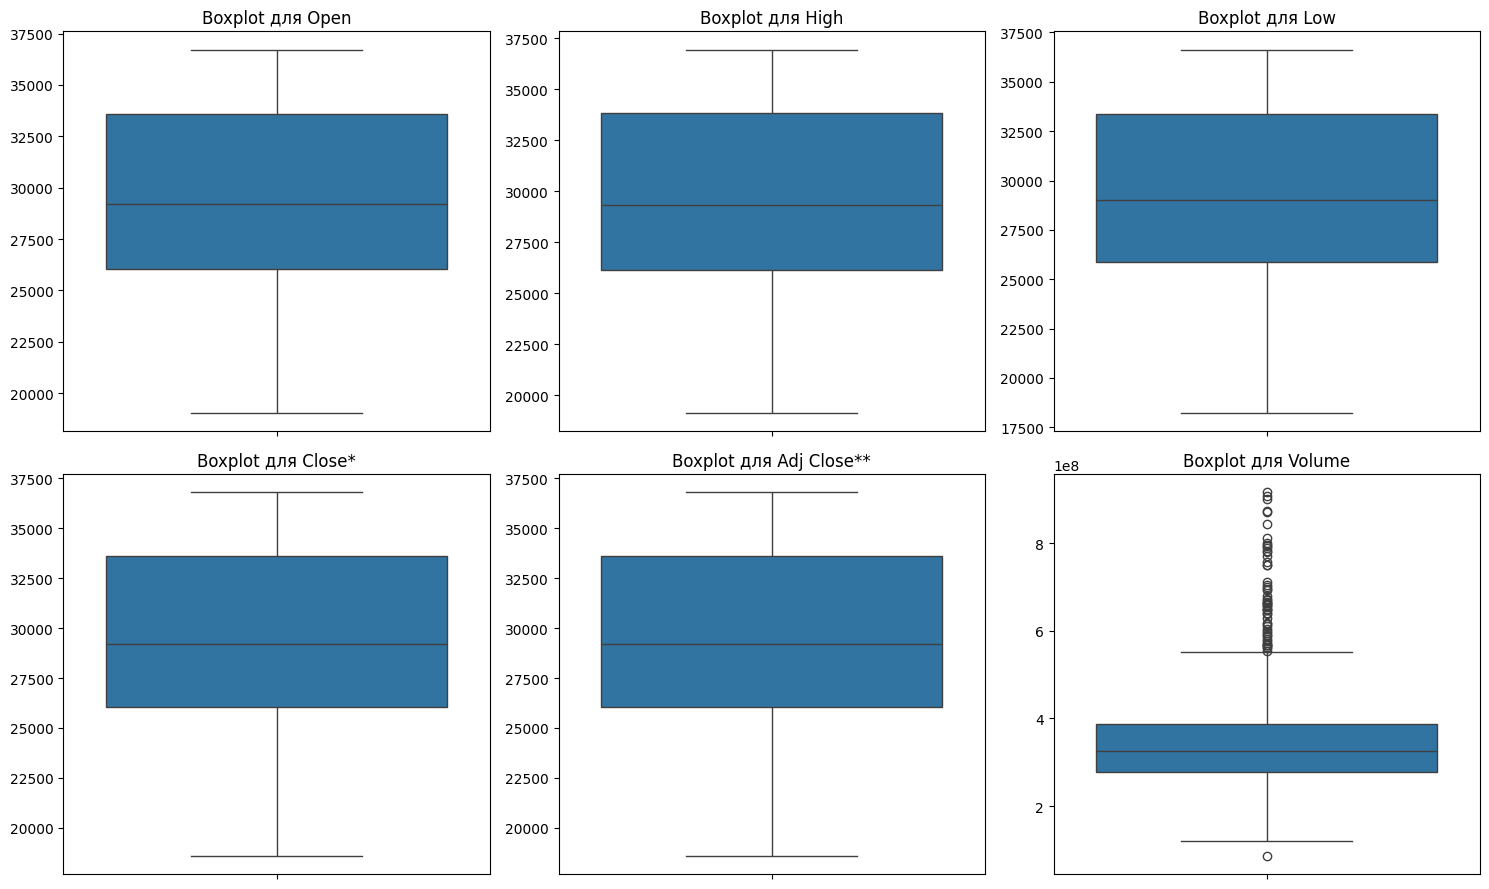

In [87]:
plt.figure(figsize=(15, 9))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1) # Создаем сетку 2x3 для графиков
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot для {col}')
    plt.ylabel('') # Убираем метку оси Y
plt.tight_layout()
plt.show()

### Subtask:

описательная статистика (describe);

подсчёт уникальных значений, частоты;

корреляционный анализ (corr).

In [88]:
df.describe()

,Date,Open,High,Low,Close*,Adj Close**,Volume
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,2020-10-28 09:39:12.305246464,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08
min,2018-05-01 00:00:00,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07
25%,2019-07-31 06:00:00,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08
50%,2020-10-27 12:00:00,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08
75%,2022-01-26 18:00:00,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08
max,2023-04-28 00:00:00,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08
std,NaN,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08


In [89]:
print("Подсчет уникальных значений и частот для всех столбцов:")
for col in df.columns:
    print("\n", df[col].value_counts())

Подсчет уникальных значений и частот для всех столбцов:

 Date
2018-05-01    1
2023-04-28    1
2023-04-27    1
2023-04-26    1
2023-04-25    1
             ..
2023-04-10    1
2023-04-11    1
2023-04-12    1
2023-04-13    1
2023-04-14    1
Name: count, Length: 1258, dtype: int64

 Open
24117.29    1
33797.43    1
33381.66    1
33596.34    1
33828.34    1
           ..
33425.25    1
33586.75    1
33764.21    1
33668.97    1
33981.71    1
Name: count, Length: 1258, dtype: int64

 High
24117.29    1
34104.56    1
33859.75    1
33645.83    1
33875.49    1
           ..
33590.24    1
33781.29    1
33895.43    1
34054.99    1
34082.94    1
Name: count, Length: 1258, dtype: int64

 Low
35290.12    2
34665.50    2
25657.78    2
28278.24    1
28445.60    1
           ..
35374.46    1
35289.86    1
35287.05    1
35348.48    1
34867.07    1
Name: count, Length: 1255, dtype: int64

 Close*
32798.40    2
27691.49    2
34798.00    2
28455.09    1
28551.53    1
           ..
35360.73    1
35312.53    

In [90]:
print("Корреляционный анализ:")
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

Корреляционный анализ:
                 Open      High       Low    Close*  Adj Close**    Volume
Open         1.000000  0.999043  0.998626  0.997592     0.997592 -0.088002
High         0.999043  1.000000  0.998198  0.998682     0.998682 -0.073388
Low          0.998626  0.998198  1.000000  0.998839     0.998839 -0.115077
Close*       0.997592  0.998682  0.998839  1.000000     1.000000 -0.096766
Adj Close**  0.997592  0.998682  0.998839  1.000000     1.000000 -0.096766
Volume      -0.088002 -0.073388 -0.115077 -0.096766    -0.096766  1.000000


# **C. Визуализация данных**

### Subtask:

Построение 5 графиков.

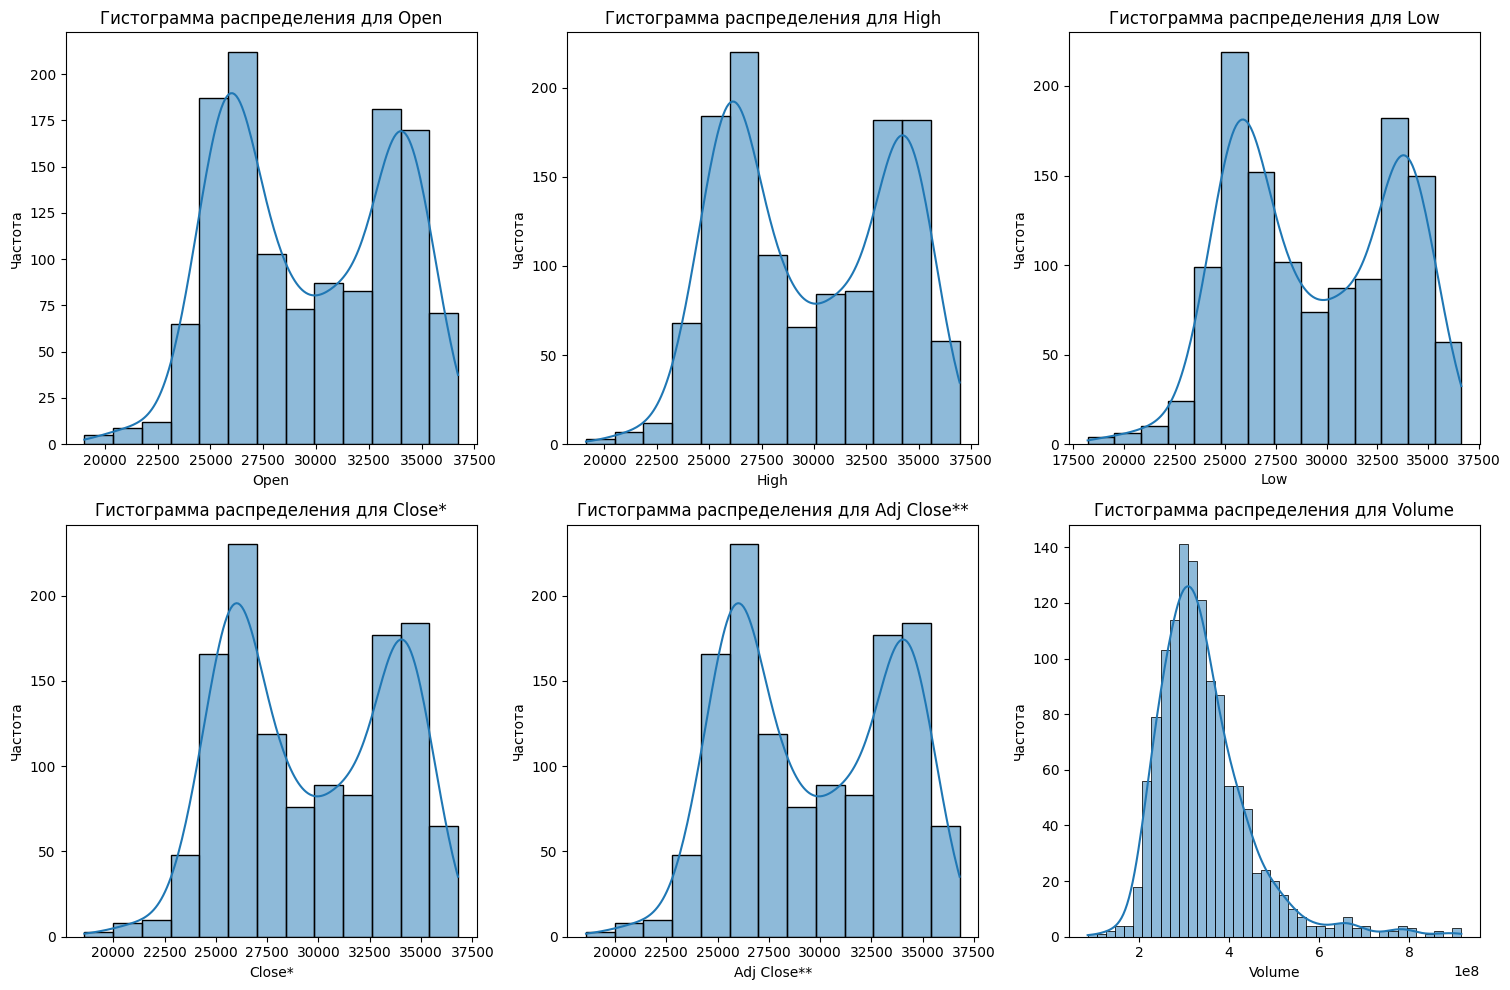

In [91]:
# Гистограммы распределений
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Гистограмма распределения для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')
plt.tight_layout()
plt.show()

In [ ]:
# Линейный график
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Close*', data=df)
plt.title('Изменение цены закрытия со временем')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)
plt.show()

In [ ]:
# Столбчатая диаграмма
df['Year'] = df['Date'].dt.year
yearly_volume = df.groupby('Year')['Volume'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Volume', data=yearly_volume)
plt.title('Общий объем торгов по годам')
plt.xlabel('Год')
plt.ylabel('Объем торгов')
plt.show()

In [ ]:
# Матрица корреляций (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

# **D. Группировки и агрегации**

### Subtask:

Применение группировки (groupby) и выполнение 3 видов агрегаций.

In [ ]:
# 1. Агрегация: Среднее значение цены закрытия и медиана для 'High' по годам
yearly_avg_close = df.groupby('Year')['Close*'].mean().reset_index()
yearly_median_high = df.groupby('Year')['High'].median().reset_index()
print("\nСредняя цена закрытия по годам:")
print(yearly_avg_close)
print("\nМедианное значение High по годам:")
print(yearly_median_high)

# 2. Агрегация: Суммарный объем торгов по годам
yearly_volume_sum = df.groupby('Year')['Volume'].sum().reset_index()
print("\nСуммарный объем торгов по годам:")
print(yearly_volume_sum)

# 3. Агрегация: Подсчет количества записей/дней по годам
yearly_count = df.groupby('Year').size().reset_index(name='Count of Days')
print("\nКоличество торговых дней по годам:")
print(yearly_count)

In [ ]:
# 4. Пример сводной таблицы (pivot_table)
print("\nСводная таблица (средняя цена открытия и закрытия по годам):")
pivot_table = df.pivot_table(values=['Open', 'Close*'], index='Year', aggfunc='mean')
pivot_table